## Rule of 0.5

**Purpose**

It has been proposed that "*when encoded using the public MDL MACCS keys, more than 90% of individual marketed drugs obey a ‘rule of 0.5’ mnemonic... a successful drug is likely to lie within a Tanimoto distance of 0.5 of a known human metabolite*".

This notebook provides a function that performs a similarity comparison (based on Tanimoto distances of MACCS Keys) of a chemical structure provided by the user and a dataset of human metabolites from the *Human Metabolome Database*. If the distance of the structure to any metabolite present in the dataset is within 0.5, it is regarded as metabolite-like.

**Sources:**

Dobson PD, Patel Y, Kell DB. 'Metabolite-likeness' as a criterion in the design and selection of pharmaceutical drug libraries. **Drug Discov Today**. 2009 Jan;14(1-2):31-40. doi:10.1016/j.drudis.2008.10.011

O Hagan S, Swainston N, Handl J, Kell DB. A 'rule of 0.5' for the metabolite-likeness of approved pharmaceutical drugs. **Metabolomics**. 2015;11(2):323-339. doi:10.1007/s11306-014-0733-z

Wishart DS, Feunang YD, Marcu A, Guo AC, Liang K, Vázquez-Fresno R, Sajed T, Johnson D, Li C, Karu N, Sayeeda Z, Lo E, Assempour N, Berjanskii M, Singhal S, Arndt D, Liang Y, Badran H, Grant J, Serra-Cayuela A, Liu Y, Mandal R, Neveu V, Pon A, Knox C, Wilson M, Manach C, Scalbert A. HMDB 4.0: the human metabolome database for 2018. **Nucleic Acids Res**. 2018 Jan 4;46(D1):D608-D617. doi:10.1093/nar/gkx1089

**Dataset details:**
   - Source: https://hmdb.ca/downloads
   - Name: Metabolite Structures 
   - Format: .sdf
   - Released on: 09/07/2018
   - File Size: 46.3 MB
   - Number of structures: 113983
   - Downloaded on: 25/02/2021

### Import datasets

In [1]:
import rdkit
print('rdkit: {}'.format(rdkit.__version__))
import sys
print('Python: {}'.format(sys.version))
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem import SDMolSupplier

rdkit: 2020.03.2
Python: 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]


### Import Human Metabolome Database

In [2]:
suppl = SDMolSupplier(r"datasets/hmdb_25-02-2021.sdf")
print(f"Number of metabolites in database: {len(suppl)}")

Number of metabolites in database: 113983


### Verifying rule of 0.5 compliance

The following function allows you to determine Rule of 0.5 compliance and shows the first metabolite that is similar to the target compound.

In [3]:
def find_similar_metabolite(compound_smiles, database):
    compound_maccs = MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(compound_smiles))
    for mol in database:
        if mol is None:
            continue
        if DataStructs.FingerprintSimilarity(compound_maccs, MACCSkeys.GenMACCSKeys(mol)) >= 0.5:
            print("Compound follows the rule of 0.5")
            return [Chem.MolFromSmiles(compound_smiles), mol]
    else:
        print("Compound fails the rule of 0.5 and is not metabolite-like.")
        return

If you wish to test a different compound, modify the `compound_smiles` variable below.

Let's test a known compound (imatinib) for metabolite-likeness.

Compound follows the rule of 0.5


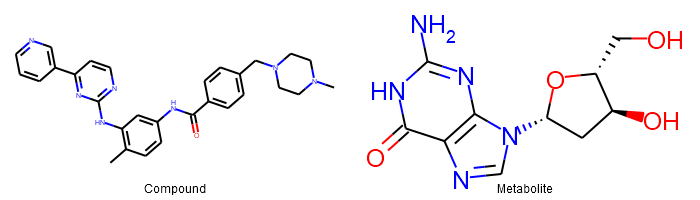

In [4]:
# Test compound: imatinib
compound_smiles = "CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5"  # modify this to test a different compound
img = Chem.Draw.MolsToImage(find_similar_metabolite(compound_smiles, suppl), subImgSize=(350,200), 
                            legends=["Compound", "Metabolite"])
img